# Churn in Telecom's dataset

### The aim of this project is to solve the problem of churn predication. 

### Classification Algorithms
#### 1. Random Forest
#### 2. KNeighborsClassifier
#### 3. Decision Tree
#### 4. Logistic Regression
#### 5. Ada Boost Classifier
#### 6. Gradient Boosting Classifier

### Content
#### 1. Data exploration
#### 2. Data visualization and Data engineering
#### 3. Modelling

## (1) Data exploration

In [32]:
# Please run this project in Python 3 environment
# Importing required libraries
import pandas as pd
import numpy as np

# ignore the step of plt.show()
%matplotlib inline

In [33]:
# dataset import
df = pd.read_csv('churn_dataset.csv')
# show the shape of dataset
df.shape
print('\033[1m'+ 'The shape of this dataset is {}'.format(df.shape))

The shape of this dataset is (3333, 21)


In [34]:
# show all columns and rows
pd.set_option('max_columns',30)
pd.set_option('max_row',3333)

In [35]:
# show the columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
# Display the first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# The information of the dataset, there is no missing value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

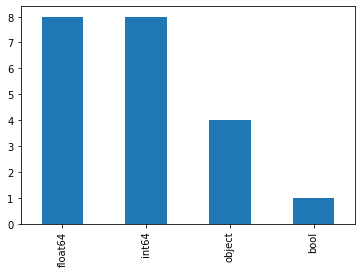

In [7]:
# Feature type distribution
df.dtypes.value_counts().plot(kind='bar')

#### We found that:
#### 8 Features are float type
#### 8 Features are integer type
#### 4 Features are object type
#### 1 Feature is Boolean type

In [36]:
# Count distinct observations
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

#### We found that 'phone number' is unique

In [10]:
# Visualize missing values, and give the sum of missing values.
df_isnull = df.isnull().sum()
missing_data = pd.DataFrame({'Missing Ratio' :df_isnull})
missing_data

,Missing Ratio
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


#### There is no missing value in the dataset.
#### If there is missing value, please use following method:
#### df.fillna(0) --- use 0 to fill
#### df.fillna(column.mean()) --- use mean value to fill
#### df.dropna() --- drop the row has missing value
#### df.dropna(axis=1) --- drop the column has missing value

In [11]:
# Detect duplicated data
IsDuplicated = df.duplicated()
print(IsDuplicated.unique())

[False]


#### There is no duplicated data.
#### if there is duplicated data, please run the following code:
#### df.drop_duplicates(subset=['phone number'],keep=False) --- drop duplicated data

In [12]:
# Dataset description,The percentiles of 0.00, 0.25, 0.5, 0.75, 1.00 will be included in the output, as well as count sum, mean and std
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


####  Variable Description

In [13]:
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']
numerical_features = ['account length', 'phone number',
       'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

print("Categorical features : " + str(len(categorical_features)))
print("Numerical features : " + str(len(numerical_features)))

Categorical features : 4
Numerical features : 16


## (2) Data visualization and data engineering

In [37]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# firstly, we should check the distribution target data
df.groupby('churn')['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

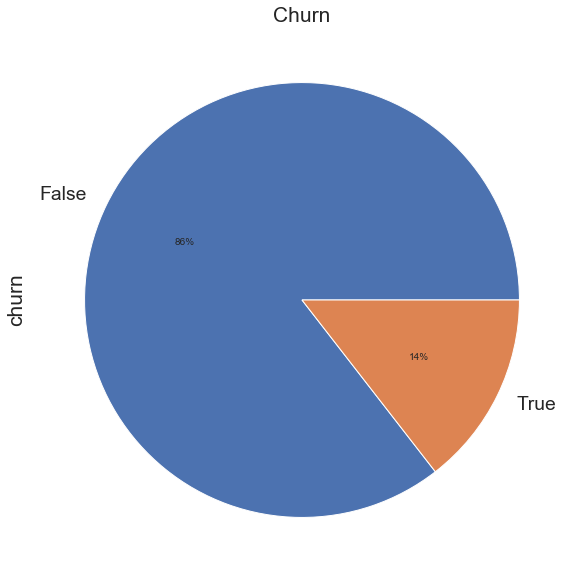

In [39]:
# Visulize target data
fig, ax = plt.subplots(figsize=(10, 10))
df['churn'].value_counts().plot(kind='pie', autopct='%1.0f%%', title = 'Churn')

### It is easy to see that the number of NO CHURN customer is much more that the number of CHURN customer ( 6.15 : 1). So we may say the data is IMBALANCED. We will keep tacking this problem.

Text(0.5, 1.0, 'state vs churn')

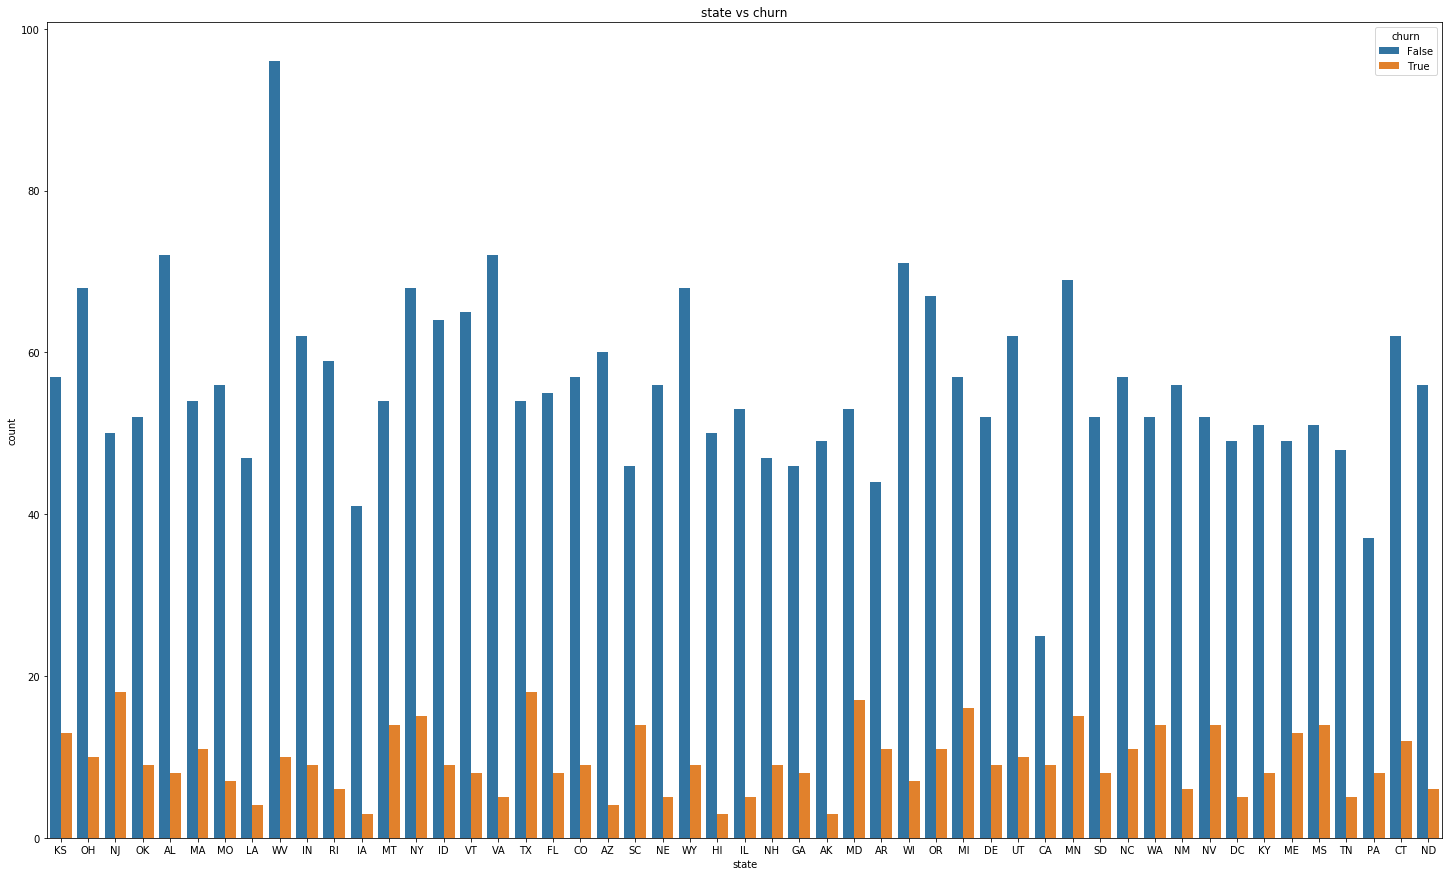

In [17]:
# Secondly, check out 'state'
fig, ax = plt.subplots(figsize=(25, 15))
sns.countplot(x='state', hue='churn', data=df)
ax.set_title('state vs churn')

####  From this figure, it is difficult to say there is an corralation between 'state' and 'churn'.

Text(0.5, 1.0, 'area code vs churn')

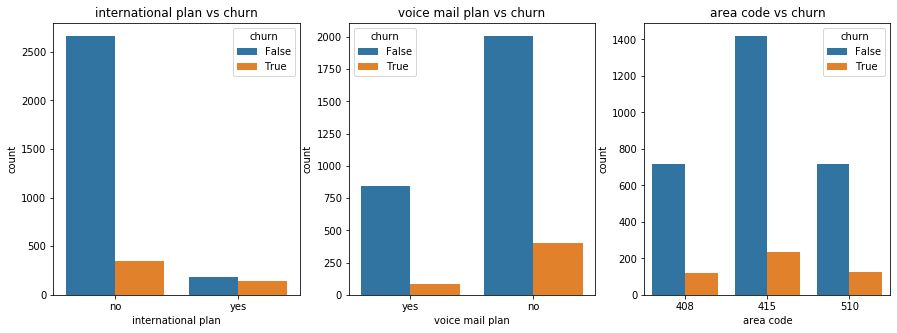

In [18]:
# check out other categorical variables: 'international plan', 'voice mail plan', 'area code'
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='international plan', hue='churn', data=df, ax=axs[0])
axs[0].set_title('international plan vs churn')
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axs[1])
axs[1].set_title('voice mail plan vs churn')
sns.countplot(x='area code', hue='churn', data=df, ax=axs[2])
axs[2].set_title('area code vs churn')

#### From these figures, the customer with a higher number for these three features are more likely to churn. 

(-2, 8)

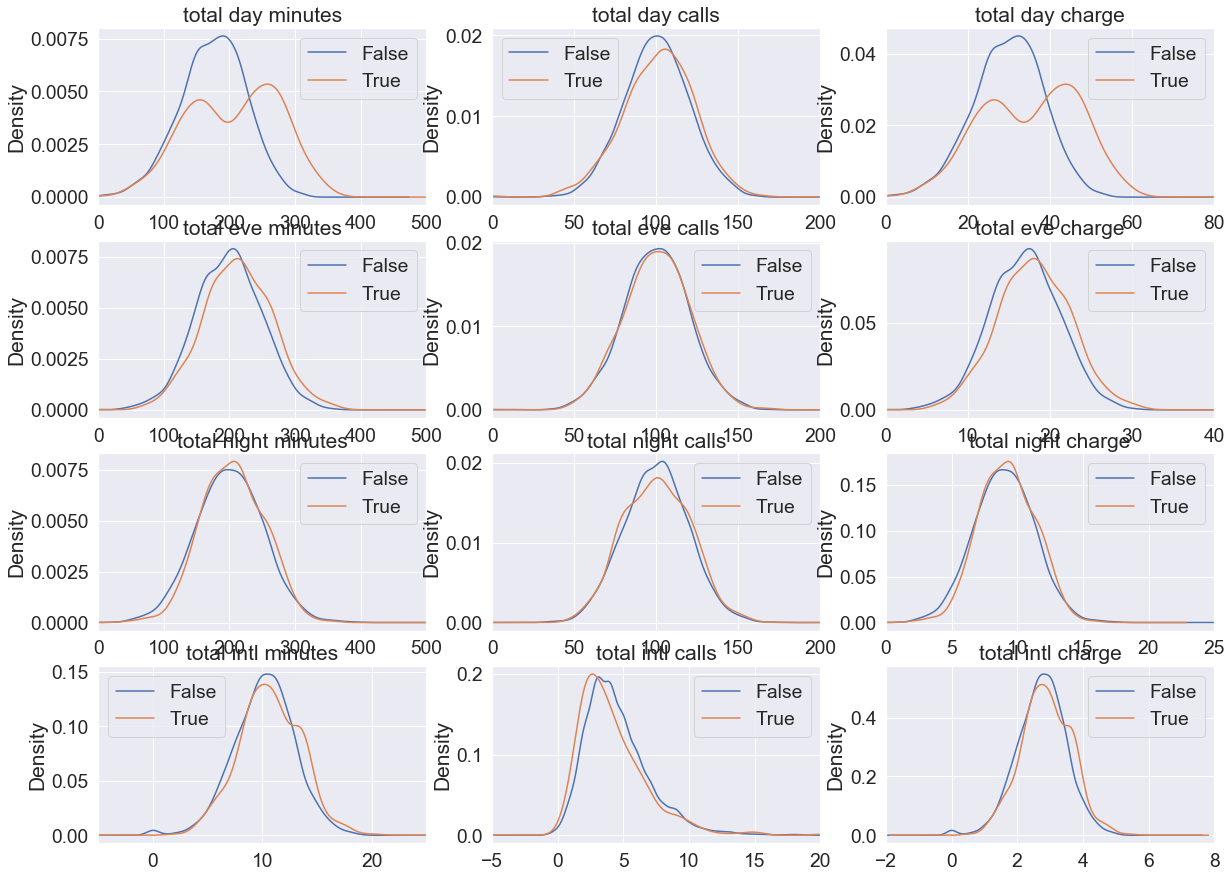

In [40]:
# check out numerical variables: 
# 'total day minutes', 'total day calls', 
# 'total eve minutes', 'total eve calls', 
# 'total night minutes', 'total night calls', 
# 'total intl minutes', 'total intl calls'
# I used Kernal Dnesity Estimates to visualize
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
 
df.groupby(['churn'])['total day minutes'].plot(kind='kde', legend=True, ax=axs[0,0]); axs[0,0].set_title('total day minutes')
df.groupby(['churn'])['total day calls'].plot(kind='kde', legend=True, ax=axs[0,1]); axs[0,1].set_title('total day calls')
df.groupby(['churn'])['total day charge'].plot(kind='kde', legend=True, ax=axs[0,2]); axs[0,2].set_title('total day charge')
axs[0,0].set_xlim((0, 500))
axs[0,1].set_xlim((0, 200))
axs[0,2].set_xlim((0, 80))

df.groupby(['churn'])['total eve minutes'].plot(kind='kde', legend=True, ax=axs[1,0]); axs[1,0].set_title('total eve minutes')
df.groupby(['churn'])['total eve calls'].plot(kind='kde', legend=True, ax=axs[1,1]); axs[1,1].set_title('total eve calls')
df.groupby(['churn'])['total eve charge'].plot(kind='kde', legend=True, ax=axs[1,2]); axs[1,2].set_title('total eve charge')
axs[1,0].set_xlim((0, 500))
axs[1,1].set_xlim((0, 200))
axs[1,2].set_xlim((0, 40))

df.groupby(['churn'])['total night minutes'].plot(kind='kde', legend=True, ax=axs[2,0]); axs[2,0].set_title('total night minutes')
df.groupby(['churn'])['total night calls'].plot(kind='kde', legend=True, ax=axs[2,1]); axs[2,1].set_title('total night calls')
df.groupby(['churn'])['total night charge'].plot(kind='kde', legend=True, ax=axs[2,2]); axs[2,2].set_title('total night charge')
axs[2,0].set_xlim((0, 500))
axs[2,1].set_xlim((0, 200))
axs[2,2].set_xlim((0, 25))


df.groupby(['churn'])['total intl minutes'].plot(kind='kde', legend=True, ax=axs[3,0]); axs[3,0].set_title('total intl minutes')
df.groupby(['churn'])['total intl calls'].plot(kind='kde', legend=True, ax=axs[3,1]); axs[3,1].set_title('total intl calls')
df.groupby(['churn'])['total intl charge'].plot(kind='kde', legend=True, ax=axs[3,2]); axs[3,2].set_title('total intl charge')
axs[3,0].set_xlim((-5, 25))
axs[3,1].set_xlim((-5, 20))
axs[3,2].set_xlim((-2, 8))



#### Total day minutes, when the total day minutes equal to 200 and total day charge equal to around 35, the valley value appears, which means the customer is more likey not to churn.

(0, 10)

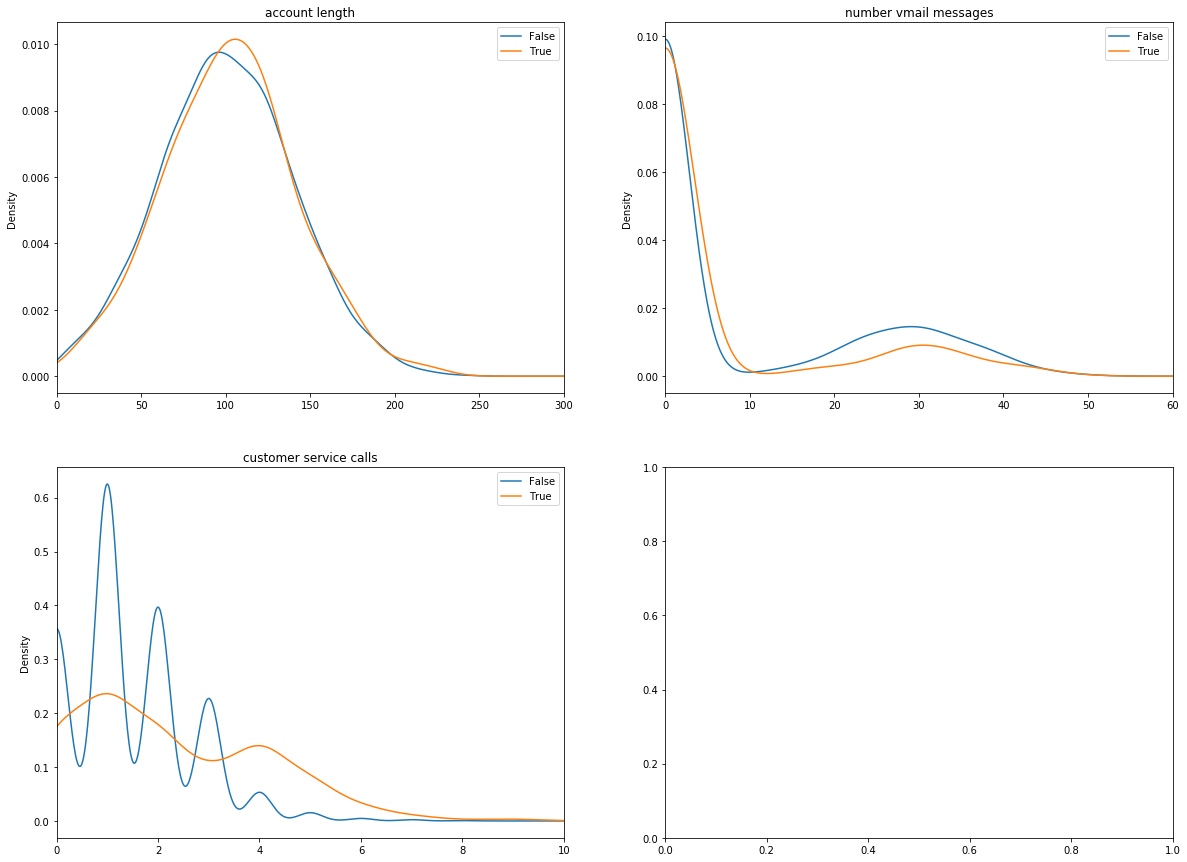

In [20]:
# check other numerical variables: 
# 'account length', 'number vmail messages', 'customer service calls'

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

df.groupby(['churn'])['account length'].plot(kind='kde', legend=True, ax=axs[0,0]); axs[0,0].set_title('account length')
df.groupby(['churn'])['number vmail messages'].plot(kind='kde', legend=True, ax=axs[0,1]); axs[0,1].set_title('number vmail messages')
df.groupby(['churn'])['customer service calls'].plot(kind='kde', legend=True, ax=axs[1,0]); axs[1,0].set_title('customer service calls')
axs[0,0].set_xlim((0, 300))
axs[0,1].set_xlim((0, 60))
axs[1,0].set_xlim((0, 10))

#### Lineplot is not suitable for 'customer service calls', although it is a numerical feature.

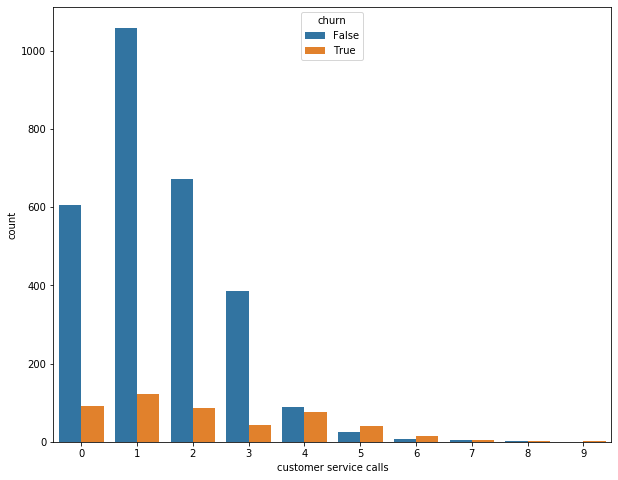

In [21]:
# check out 'customer service calls' again.
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='customer service calls', hue='churn', data=df)

#### It is hard to say there is any correlation between 'customer service calls' and 'churn'

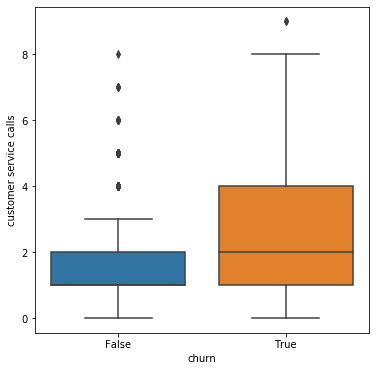

In [22]:
# Try boxplot
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x='churn', y='customer service calls', data=df)

#### This figure shows that the customers with churn have a higher variance for the customer service calls, the customers with no churn have more outliers for the customer service calls, 

### Feature processing---Encoding

In [23]:
# 'state', 'international plan', 'voice mail plan' and 'churn' are categorical features
# we should perform encoding on categorical features.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [24]:
# 'international plan', 'voice mail plan' and 'churn' are binary categoical feature, use LabelEncoder
# Because 'state' has too many values, One-hot encoding is not suitable in this case
label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


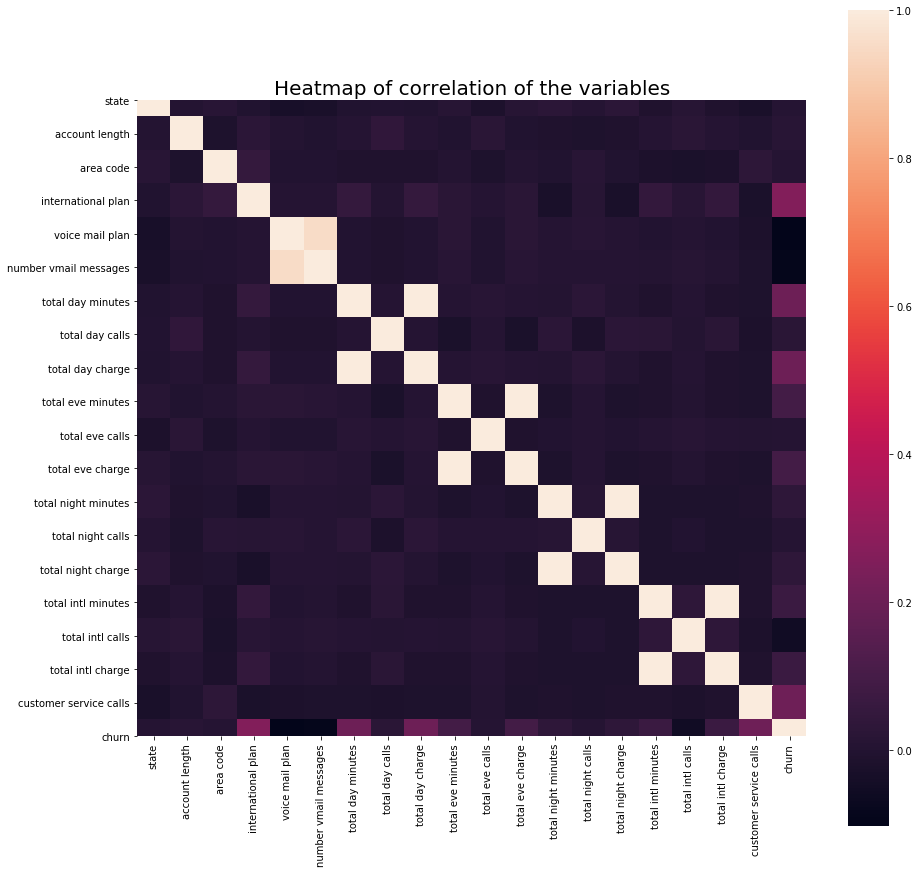

In [25]:
# Variable correlation plot
# Draw the heatmap using seaborn
corrmat = df.corr(method='pearson')
fig, axs = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title('Heatmap of correlation of the variables', fontsize=20)
plt.show()

In [31]:
# Variable correlation plot
# Draw the pairplot using seaborn
#sns.set(font_scale=1.75)
#sns.pairplot(df,diag_kind='kde')

In [27]:
# Perform one-hot encoding on column'area code'
df = pd.get_dummies(df, columns=['area code'])
df.head(20)

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510
0,16,128,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1,0
1,35,107,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1,0
2,31,137,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0
3,35,84,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0,0
4,36,75,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0
5,1,118,391-8027,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0,0,1
6,19,121,355-9993,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0,0,1
7,24,147,329-9001,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,0,1,0
8,18,117,335-4719,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,1,0,0
9,49,141,330-8173,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,0,1,0


In [28]:
# Sort variable importance from high to low
print('\033[1m'+'Find the most important features related to target')
corr = df.corr()
corr.sort_values(['churn'], ascending = False, inplace = True)
print('\033[0m',corr.churn)

Find the most important features related to target
 churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
state                     0.007780
area code_510             0.006423
total night calls         0.006141
area code_408             0.001103
area code_415            -0.006535
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


### Conclusion
#### A high correlation between :  
####    (1) 'voice mail plan' and 'number of vmail messages'
####    (2) 'total day minutes' and 'total day charge'
####    (3) 'total eve minutes and 'total eve charge'
####    (4) 'total night minutes' and 'total night charge'
####    (5) 'total intl minutes' and 'total intl charge'

## (3) Modelling --- Binary classification problem --- supervised learning.

In [29]:
y = df['churn']
X = df.drop(['churn','phone number'], axis=1)

In [31]:
# Partition the dataset in training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (2333, 21)
X_test : (1000, 21)
y_train : (2333,)
y_test : (1000,)


In [32]:
# Using SMOTE to deal with the data imbalanced problem
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, ratio=1.0)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
print("X_train_balanced : " + str(X_train_balanced.shape))
print("y_train_balanced : " + str(y_train_balanced.shape))

X_train_balanced : (3976, 21)
y_train_balanced : (3976,)


### Several scores will be perfomed to evaluate classifiers
#### Confusion matrix:
####  A/P    Pos    Neg
####  Pos                    TP             TN
####  Neg                     FP             FN
#### Accuracy = (TP + TN) / (TP + FP + FN + TN)
#### Precision = TP / (TP + FP)
#### Recall = TP / (TP + FN)
#### f1 scoare = 2*((Precision*Recall)/(Precision+Recall)

#### Random Forest Classifier

In [33]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score  
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ',precision_score(y_test, y_pred))   
print('Recall score: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

# Build a list to gather the performance of each classifier
result = pd.DataFrame(data=[['Random Forest Classifier',
                            accuracy_score(y_test, y_pred), 
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                            f1_score(y_test,y_pred)]],
                            columns=['Classifier', 'Accuracy', 'Precision score', 'Recall score', 'f1_score'])

Accuracy score:  0.934
Precision score:  0.8913043478260869
Recall score:  0.5942028985507246
F1 score:  0.7130434782608696
[[852  10]
 [ 56  82]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### K-Neighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ',precision_score(y_test, y_pred))   
print('Recall score: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

result.loc[1] = ['K-Neighbors Classifier',
                accuracy_score(y_test, y_pred), 
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test,y_pred)]

Accuracy score:  0.867
Precision score:  0.5555555555555556
Recall score:  0.18115942028985507
F1 score:  0.27322404371584696
[[842  20]
 [113  25]]


#### Logistic Regression Classifier

In [35]:
from sklearn.linear_model import LogisticRegression
 
logisticRegression = LogisticRegression(penalty='l2')
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ',precision_score(y_test, y_pred))   
print('Recall score: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

result.loc[2] = ['Logistic Regression Classifier',
                accuracy_score(y_test, y_pred), 
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test,y_pred)]

Accuracy score:  0.872
Precision score:  0.6136363636363636
Recall score:  0.1956521739130435
F1 score:  0.2967032967032967
[[845  17]
 [111  27]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Decision Tree Classifier

In [36]:
from sklearn import tree
 
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ',precision_score(y_test, y_pred))   
print('Recall score: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

result.loc[3] = ['Decision Tree Classifier',
                accuracy_score(y_test, y_pred), 
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test,y_pred)]

Accuracy score:  0.9
Precision score:  0.6104651162790697
Recall score:  0.7608695652173914
F1 score:  0.6774193548387097
[[795  67]
 [ 33 105]]


#### Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
 
GradientBoosting = GradientBoostingClassifier(n_estimators=200)
GradientBoosting.fit(X_train, y_train)
y_pred = GradientBoosting.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ',precision_score(y_test, y_pred))   
print('Recall score: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

result.loc[4] = ['Gradient Boosting Classifier',
                accuracy_score(y_test, y_pred), 
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test,y_pred)]

Accuracy score:  0.949
Precision score:  0.8536585365853658
Recall score:  0.7608695652173914
F1 score:  0.8045977011494252
[[844  18]
 [ 33 105]]


#### Ada Boost Classifier

In [38]:
from sklearn.ensemble import  AdaBoostClassifier
 
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)
y_pred = AdaBoost.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ',precision_score(y_test, y_pred))   
print('Recall score: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

result.loc[5] = ['Ada Boost Classifier',
                accuracy_score(y_test, y_pred), 
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test,y_pred)]

Accuracy score:  0.875
Precision score:  0.5764705882352941
Recall score:  0.35507246376811596
F1 score:  0.43946188340807174
[[826  36]
 [ 89  49]]


In [39]:
# Result visualization
result

,Classifier,Accuracy,Precision score,Recall score,f1_score
0,Random Forest Classifier,0.934,0.891304,0.594203,0.713043
1,K-Neighbors Classifier,0.867,0.555556,0.181159,0.273224
2,Logistic Regression Classifier,0.872,0.613636,0.195652,0.296703
3,Decision Tree Classifier,0.900,0.610465,0.760870,0.677419
4,Gradient Boosting Classifier,0.949,0.853659,0.760870,0.804598
5,Ada Boost Classifier,0.875,0.576471,0.355072,0.439462


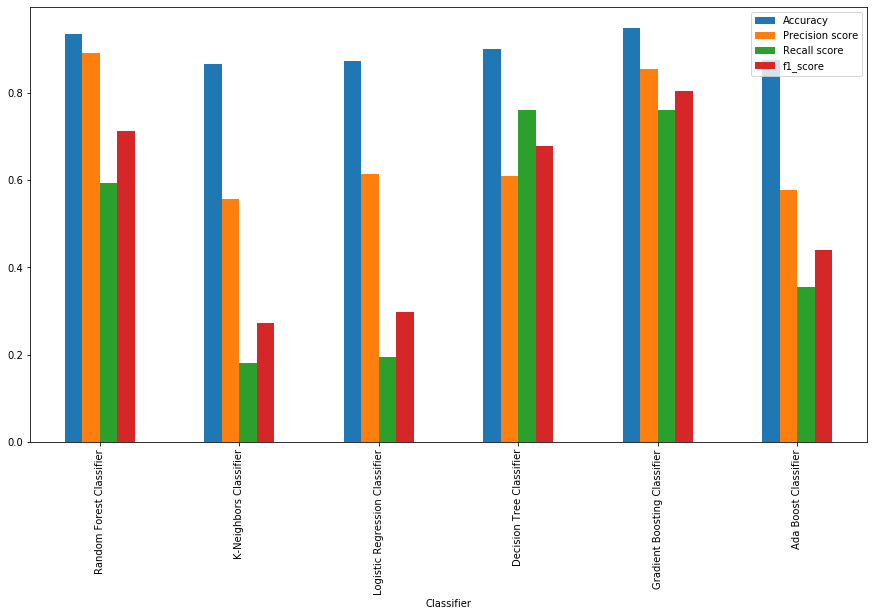

In [40]:
result.plot(figsize=(15, 8), x='Classifier', kind='bar')

#### In these six classifiers, we can see that  Gradient Boosting Classifier has the best performance. I will use balanced data train again.

In [41]:
GradientBoosting = GradientBoostingClassifier(n_estimators=200)
GradientBoosting.fit(X_train_balanced, y_train_balanced)
y_pred = GradientBoosting.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ',precision_score(y_test, y_pred))   
print('Recall score: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

result.loc[6] = ['Gradient Boosting Classifier using balanced data',
                accuracy_score(y_test, y_pred), 
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test,y_pred)]

Accuracy score:  0.949
Precision score:  0.8175182481751825
Recall score:  0.8115942028985508
F1 score:  0.8145454545454547
[[837  25]
 [ 26 112]]


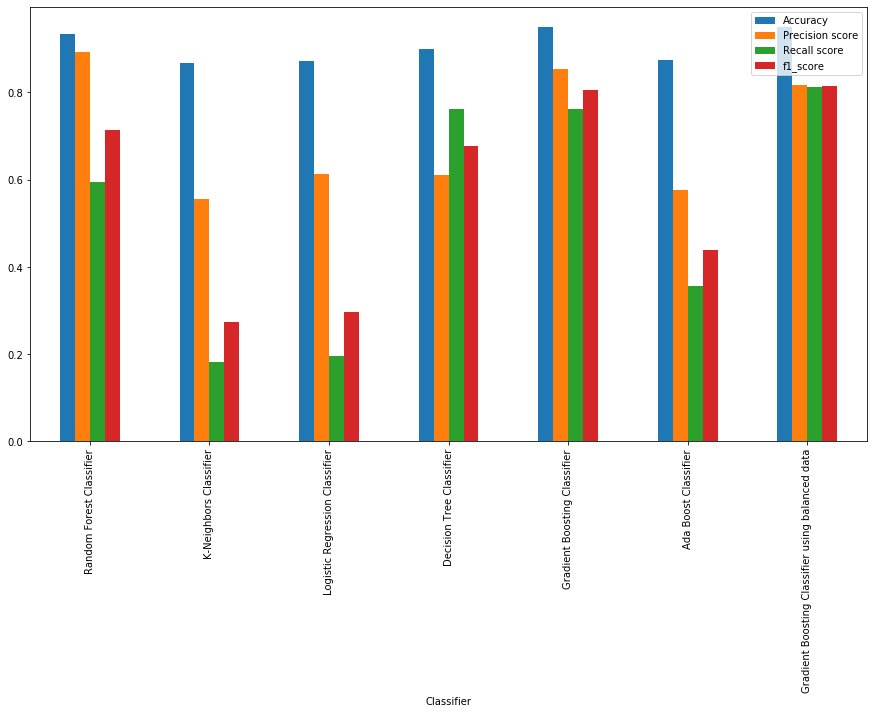

In [42]:
result.plot(figsize=(15, 8), x='Classifier', kind='bar')

### Conclusion: 
#### The aim of this project was to classify customers will churn or not. The objects of this project can be summerized as following:

#### 1. Data exploration
#### 2. Data visualization
#### 3. Categorical features encoding
#### 4. Data engineering and data analysis 
#### 5. Modelling and comparison

#### The result shows this dataset is imbalanced, and we performed SMOTE to deal with the data imbalanced problem. 
#### In the modelling and comparison stage, I trained six common used classifiers: 
#### (1) Random Forest Classifier
#### (2) K-Neighbors Classifier
#### (3) Logistic Regression Classifier
#### (4) Decision Tree Classifier
#### (5) Gradient Boosting Classifier
#### (6) AdaBoost Classifier.

#### It is not hard to see the Gradient Boosting Classifier has the best performance. After we changed the dataset to balanced data, the performance of Gradient Boosting Classifier acheieved a better result.

#### Therefore, Gradient Boosting Classifier is my suggestion can be used in the Telecom company.